## En este código se modifican datos de una empresa privada de Energía Eólica

In [31]:
library(lubridate)
library(ggplot2)
library(tidyverse)

In [32]:
#LLamado del archivo base
Tam_windspeeddata <- read.csv("~/Proyecto_Energia/Tam_windspeeddata.csv")


In [33]:
#Creando un archivo para modificar
wind1 <- Tam_windspeeddata

In [34]:
#Muestra la estructura de los datos
str(wind1)

'data.frame':	55519 obs. of  2 variables:
 $ PCTimeStamp            : Factor w/ 55519 levels "01/01/2019","01/01/2019 00:10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Avg.wind.speed.m.s.130m: num  2.5 3.5 4.3 4.4 4.3 4.4 4.6 4.3 4.7 4.2 ...


In [35]:
#Convierte todos los datos a datos tipo caracter
wind1[] <- lapply(wind1, as.character)

In [36]:
#Muestra la estructura de los datos (deben ser caracteres)
str(wind1)

'data.frame':	55519 obs. of  2 variables:
 $ PCTimeStamp            : chr  "01/01/2019" "01/01/2019 00:10" "01/01/2019 00:20" "01/01/2019 00:30" ...
 $ Avg.wind.speed.m.s.130m: chr  "2.5" "3.5" "4.3" "4.4" ...


In [37]:
#Cuenta los datos nulos por columna
sapply(wind1, function(x) sum(is.na(x)))


PCTimeStamp Avg.wind.speed.m.s.130m 
                      0                    3870

In [38]:
#Elimina filas con NA
wind1 <- na.omit(wind1)

In [39]:
#Cuenta los datos nulos por columna
sapply(wind1, function(x) sum(is.na(x)))

PCTimeStamp Avg.wind.speed.m.s.130m 
                      0                       0

In [40]:
head(wind1)

,PCTimeStamp,Avg.wind.speed.m.s.130m
,<chr>,<chr>
1,01/01/2019,2.5
2,01/01/2019 00:10,3.5
3,01/01/2019 00:20,4.3
4,01/01/2019 00:30,4.4
5,01/01/2019 00:40,4.3
6,01/01/2019 00:50,4.4


In [41]:
#Convierte la variable PCTimeStamp a tipo fecha y Avg.wind.speed a dato numérico
wind1$PCTimeStamp <- parse_date_time(wind1$PCTimeStamp,"dmy HM")
wind1$Avg.wind.speed.m.s.130m <- as.numeric(wind1$Avg.wind.speed.m.s.130m)

Warning message:
" 361 failed to parse."


In [42]:
#Crea las variables de: fecha, mes, día, año, hora y minuto por separado
wind1$fecha <- date(wind1$PCTimeStamp)
wind1$mes <- month(wind1$PCTimeStamp)
wind1$dia <- day(wind1$PCTimeStamp)
wind1$anio <- year(wind1$PCTimeStamp)
wind1$hora <- hour(wind1$PCTimeStamp)
wind1$minuto <- minute(wind1$PCTimeStamp)

In [43]:
#Elimina filas con NA
wind1 <- na.omit(wind1)

In [44]:
#Defino donde voy a guardar mi archivo de respaldo
setwd("~/Proyecto_Energia")

In [45]:
##Guardamos nuestro nuevo archivo ya con los datos en las variables correctas
write.csv(wind1, file="Viento_Tam2019.csv", row.names = F)

In [46]:
#Muestra un resumen con las estadisticas basicas de cada variable
summary(wind1$Avg.wind.speed.m.s.130m)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   5.000   7.500   7.733  10.300  22.200 

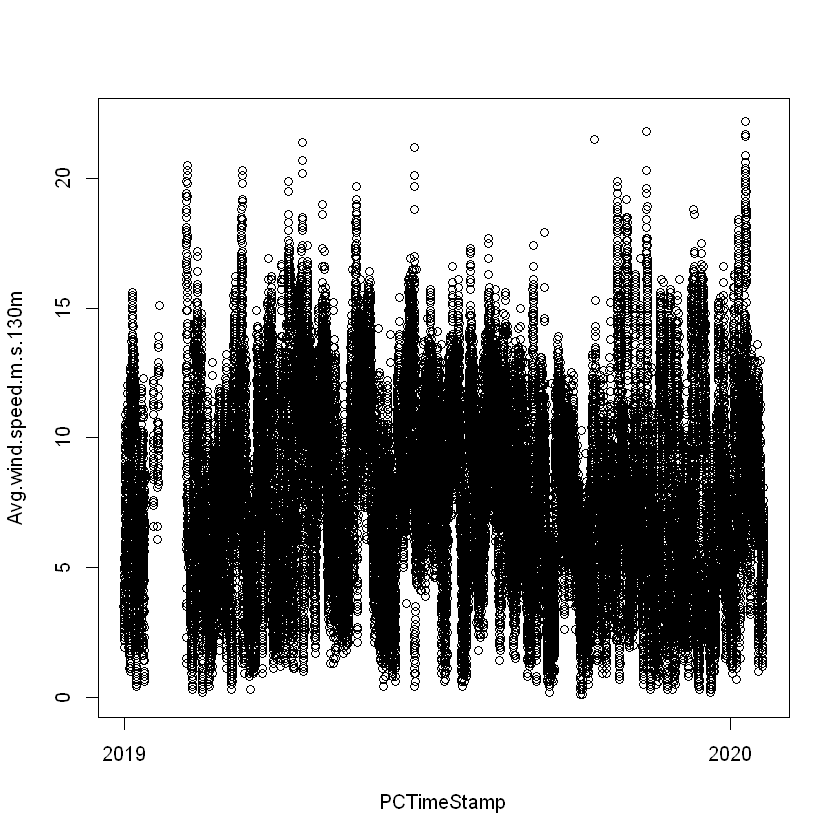

In [48]:
#Genera un archivo nuevo y grafica los datos para ver un primer comportamiento
wind_prueba <- wind1 %>% select(1:2)
plot(wind_prueba)

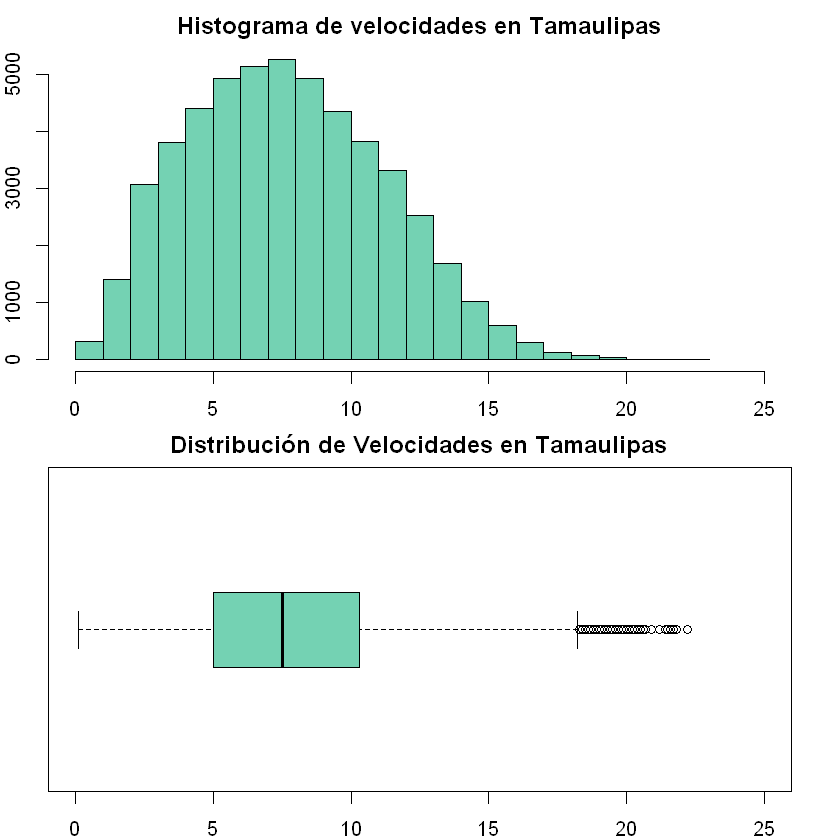

In [49]:
#Parte la pantalla en 2 filas y una columna además de definir los margenes
par(mfrow = c(2,1), mar = c(2,2,2,2))
#La primera fila sera el histograma anual de velocidades
hist(wind_prueba$Avg.wind.speed.m.s.130m, main="Histograma de velocidades en Tamaulipas", xlab="Velocidad del viento a 130m", ylab = "Frecuencia" , col="#74D2B3", xlim=c(0,25))

#La segunda fila es el diagrama de caja de las velocidades anuales a la misma escala
boxplot(wind1$Avg.wind.speed.m.s.130m, ylim= c(0,25), col="#74D2B3", horizontal = T, main = "Distribución de Velocidades en Tamaulipas", xlab = "Velocidades a 130 m (m/s)", boxwex = 0.5)


In [50]:
#Genera un archivo llamado wind_mes que agrupa los datos por mes y obtiene: minimo, promedio, media y máximo por mes
wind_mes <- wind1 %>%
  group_by(mes =wind1$mes)%>%
  summarise(minim = min(Avg.wind.speed.m.s.130m,na.rm=T),mean = mean(Avg.wind.speed.m.s.130m,na.rm=T), mediana = median(Avg.wind.speed.m.s.130m,na.rm=T),max = max(Avg.wind.speed.m.s.130m,na.rm=T))


In [52]:
wind_mes

mes,minim,mean,mediana,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4,7.893214,7.70,22.2
2,0.2,6.440241,5.90,20.5
3,0.3,7.630070,7.60,20.3
4,1.0,8.805618,9.05,21.4
5,1.3,8.953320,9.10,19.7
6,0.4,7.727739,7.60,21.2
7,0.4,8.783465,9.30,17.3
8,1.4,8.548861,8.50,17.7
9,0.2,7.087308,7.10,17.9


In [53]:
#Guardo el resumen de cada mes eliminando el númer de fila al guardar
write.csv(wind_mes, file="Viento_mesTam.csv", row.names = F)

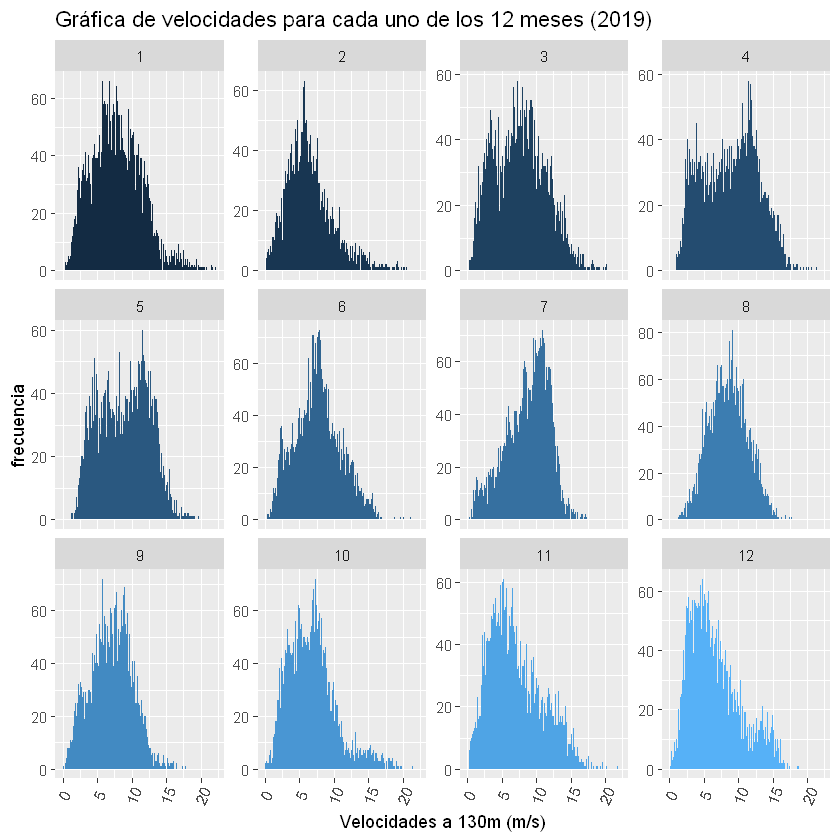

In [54]:
#Grafica las velocidades agrupandolas por mes
ggplot(data = wind1, aes(x = Avg.wind.speed.m.s.130m, fill = mes)) +
  geom_bar() +
  facet_wrap(~mes, scales = 'free_y')+
  theme(axis.text.x = element_text(angle=65, vjust=0.6),legend.position = "none") +
  xlab('Velocidades a 130m (m/s)')+
  ylab('frecuencia')+
  ggtitle('Gráfica de velocidades para cada uno de los 12 meses (2019)')


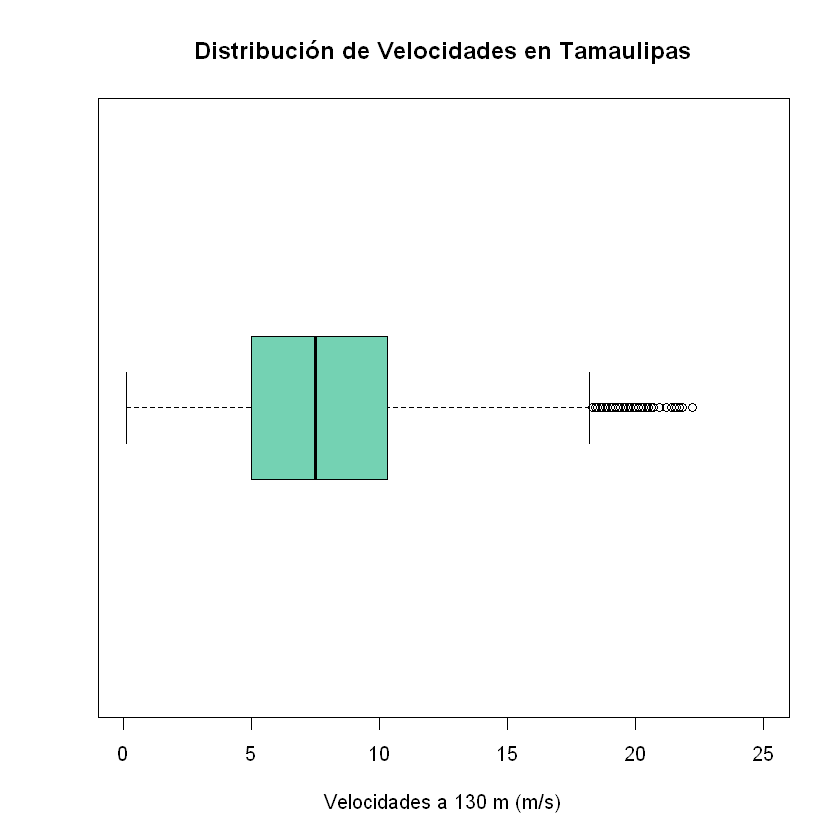

In [55]:
#Grafica de box plot para wind 1
boxplot(wind1$Avg.wind.speed.m.s.130m, ylim= c(0,25), col="#74D2B3", horizontal = T, main = "Distribución de Velocidades en Tamaulipas", xlab = "Velocidades a 130 m (m/s)", boxwex = 0.5)

<ul> De acuerdo a la gráfica anterior el viento en Tamaulipas se puede clasificar en cuartiles que se encuentran de la siguiente manera: </ul>
    <li> 0.1   inicio 1er cuartil </li>
    <li> 5.0   inicio 2do cuartil </li>
    <li> 7.5   media </li>
    <li> 10.3  final 3er cuartil </li>
    <li> 18.2  final 4to cuartil </li>

De acuerdo al resumen obtenido por mes y a las gráficas febrero(mes 2) y diciembre(mes 12) son los que tienen velocidades de viento más bajas por lo que buscaremos las velocidades de viento por horario para ver si hay 
horarios en los que sea mejor trabajar 

In [57]:
#Genera un archivo llamado wind_feb que agrupa los datos por hora y obtiene: minimo, promedio, media y máximo por mes
wind_feb <- filter(wind1, wind1$mes == 2)

In [58]:
wind_feb <- wind_feb %>%
  group_by(hora = wind_feb$hora)%>%
  summarise(minim = min(Avg.wind.speed.m.s.130m,na.rm=T),mean = mean(Avg.wind.speed.m.s.130m,na.rm=T), mediana = median(Avg.wind.speed.m.s.130m,na.rm=T),max = max(Avg.wind.speed.m.s.130m,na.rm=T))

In [59]:
wind_feb

hora,minim,mean,mediana,max
<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,1.4,7.134286,5.90,20.5
1,0.3,7.015079,6.50,19.3
2,0.5,7.300000,7.10,14.2
3,0.4,6.426190,5.90,15.6
4,0.5,5.814286,5.80,17.2
5,0.3,5.893651,5.65,16.0
6,0.3,5.816667,5.60,14.4
7,0.2,5.721429,5.40,14.4
8,0.4,5.437302,5.00,13.1


In [60]:
#Genera un archivo llamado wind_dic que agrupa los datos por hora y obtiene: minimo, promedio, media y máximo por mes
wind_dic <- filter(wind1, wind1$mes == 12)

In [62]:
wind_dic <- wind_dic %>%
  group_by(hora = wind_dic$hora)%>%
  summarise(minim = min(Avg.wind.speed.m.s.130m,na.rm=T),mean = mean(Avg.wind.speed.m.s.130m,na.rm=T), mediana = median(Avg.wind.speed.m.s.130m,na.rm=T),max = max(Avg.wind.speed.m.s.130m,na.rm=T))

In [63]:
wind_dic

hora,minim,mean,mediana,max
<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,1.6,8.001935,7.40,16.5
1,1.9,7.567742,6.50,16.7
2,1.1,6.983871,5.75,16.5
3,1.2,6.858065,5.65,17.5
4,0.2,6.554839,5.90,16.1
5,1.0,6.414516,5.60,14.4
6,1.8,6.734595,5.80,14.3
7,0.3,6.657955,5.70,14.8
8,0.3,6.551724,5.25,18.8
